
Количество пиковых значений PM2.5: 4128

Статистика по пиковым значениям:
count    4128.000000
mean      151.213808
std       100.137884
min        66.700000
25%        83.100000
50%       111.600000
75%       185.325000
max       769.100000
Name: NowCast Conc., dtype: float64


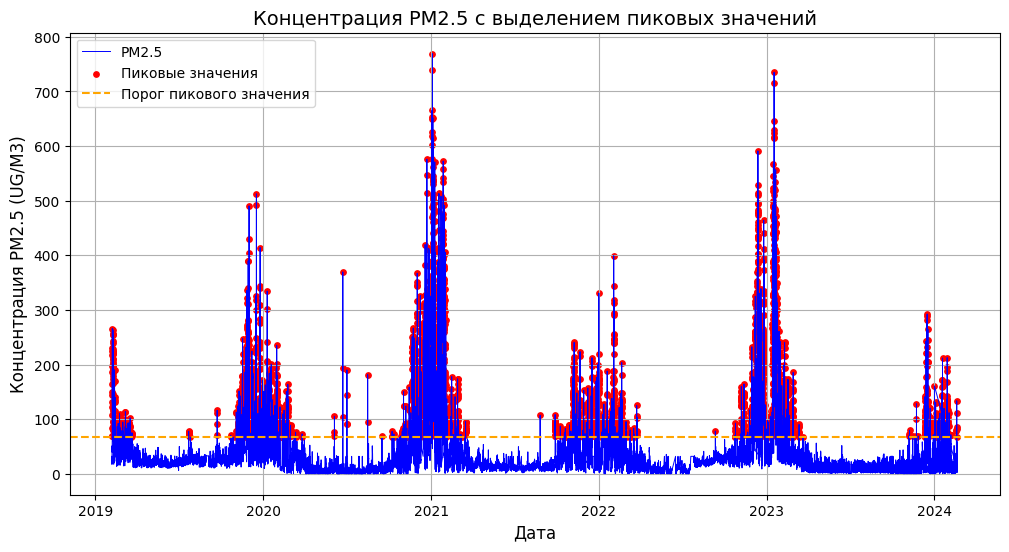

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка обработанных данных
data_path = r"C:\Users\Les\Downloads\coursework\data\processed\processed_data.csv"
data = pd.read_csv(data_path)

# Преобразование столбца с датой в datetime
data['Date (LT)'] = pd.to_datetime(data['Date (LT)'])

# Определение порога для пиковых значений (например, верхний предел IQR)
Q1 = data['NowCast Conc.'].quantile(0.25)
Q3 = data['NowCast Conc.'].quantile(0.75)
IQR = Q3 - Q1
peak_threshold = Q3 + 1.5 * IQR

# Фильтрация пиковых значений
peak_values = data[data['NowCast Conc.'] > peak_threshold]

print("\nКоличество пиковых значений PM2.5:", len(peak_values))
print("\nСтатистика по пиковым значениям:")
print(peak_values['NowCast Conc.'].describe())

# График с выделением пиковых значений
plt.figure(figsize=(12, 6))
plt.plot(data['Date (LT)'], data['NowCast Conc.'], label='PM2.5', color='blue', linewidth=0.7)
plt.scatter(
    peak_values['Date (LT)'], 
    peak_values['NowCast Conc.'], 
    color='red', 
    label='Пиковые значения', 
    s=15
)
plt.axhline(peak_threshold, color='orange', linestyle='--', label='Порог пикового значения')
plt.title("Концентрация PM2.5 с выделением пиковых значений", fontsize=14)
plt.xlabel("Дата", fontsize=12)
plt.ylabel("Концентрация PM2.5 (UG/M3)", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

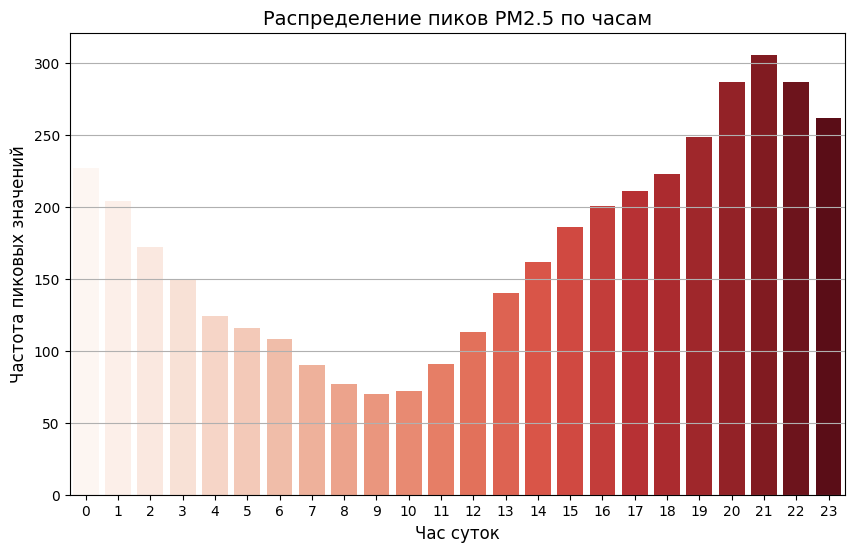

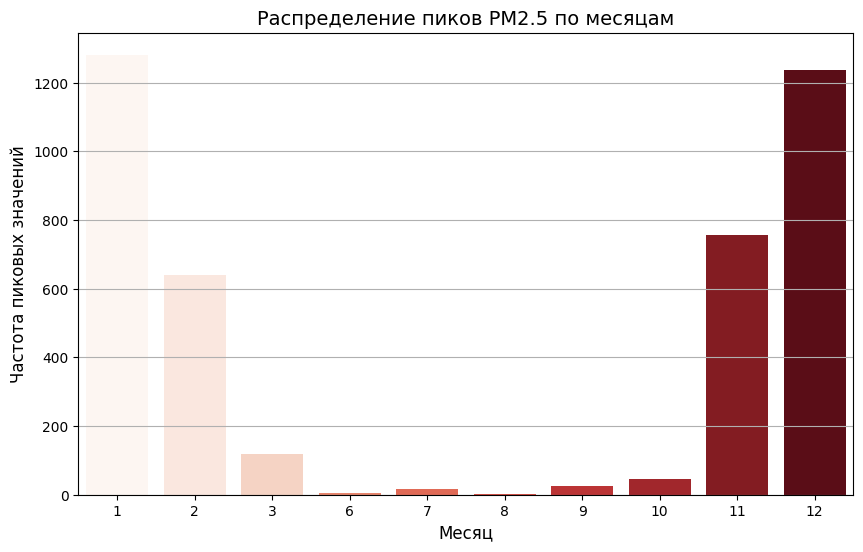

In [4]:
# Добавление временных характеристик для анализа пиков
peak_values.loc[:, 'Year'] = peak_values['Date (LT)'].dt.year
peak_values.loc[:, 'Month'] = peak_values['Date (LT)'].dt.month
peak_values.loc[:, 'Hour'] = peak_values['Date (LT)'].dt.hour

# Распределение пиков по часам
plt.figure(figsize=(10, 6))
sns.countplot(data=peak_values, x='Hour', hue='Hour', palette='Reds', legend=False)
plt.title("Распределение пиков PM2.5 по часам", fontsize=14)
plt.xlabel("Час суток", fontsize=12)
plt.ylabel("Частота пиковых значений", fontsize=12)
plt.grid(axis='y')
plt.show()

# Распределение пиков по месяцам
plt.figure(figsize=(10, 6))
sns.countplot(data=peak_values, x='Month', hue='Month', palette='Reds', legend=False)
plt.title("Распределение пиков PM2.5 по месяцам", fontsize=14)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Частота пиковых значений", fontsize=12)
plt.grid(axis='y')
plt.show()

In [6]:
# Дни с превышением пороговых значений
days_with_peaks = peak_values['Date (LT)'].dt.date.nunique()
total_days = data['Date (LT)'].dt.date.nunique()
percentage_days_with_peaks = (days_with_peaks / total_days) * 100

print(f"\nКоличество дней с пиковыми значениями: {days_with_peaks}")
print(f"Общее количество дней: {total_days}")
print(f"Процент дней с пиковыми значениями: {percentage_days_with_peaks:.2f}%")


Количество дней с пиковыми значениями: 469
Общее количество дней: 1810
Процент дней с пиковыми значениями: 25.91%
